# KNN Regression

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from assess_tree import calc_metrics

%matplotlib inline 

In [34]:
%store -r x_train x_val x_test y_train y_val y_test

# KNN Algorithm

In [35]:
def KNN_predict(x_train,y_train,x_pred,k):
    
    y_pred = np.empty(len(x_pred))
    
    for i in range(len(x_pred)):
        dist = np.linalg.norm(x_train - x_pred[i,:],axis=1) 
        knnix = np.argsort(dist)[:k]
        y_pred[i] = y_train[knnix].mean()

    return y_pred

# Tune Hyperparameters

### Number of neighbours

In [37]:
def tune_neighbours(x_train, y_train, x_pred, k):
    
    y_preds = np.empty([len(x_pred),len(k)])
    
    for i in range(len(x_pred)):
        dist = np.linalg.norm(x_train - x_pred[i,:],axis=1) 
        sort = np.argsort(dist)
        for kix,kval in enumerate(k):
            knn_ix = sort[:kval]
            y_preds[i,kix] = y_train[knn_ix].mean()
    
    return y_preds

In [38]:
%%time
y_preds_train = tune_neighbours(x_train, y_train.to_numpy(), x_train, k=range(1,16))
y_preds_val = tune_neighbours(x_train, y_train.to_numpy(), x_val, k=range(1,16))

Wall time: 1min 38s


In [39]:
def return_metrics(y_preds, y_exp):
    
    mses, rmses, maes, r2s = [], [], [], []
    
    for i in range(y_preds.shape[1]):
        mse, rmse, mae, r2 = calc_metrics(y_preds[:,i], y_exp)
        mses.append(mse)
        rmses.append(rmse)
        maes.append(mae)
        r2s.append(r2)
    
    return mses, rmses, maes, r2

In [40]:
metrics_n_tune_val = return_metrics(y_preds_val, y_val)
metrics_n_tune_train = return_metrics(y_preds_train, y_train)

In [63]:
sns.set_context('notebook')
def plot_error(train_errors, test_errors, xrange, title, xlabel):
    plt.plot(list(xrange), train_errors, label = 'Train')
    plt.plot(list(xrange), test_errors, label = 'Validate', c='r')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(list(xrange))
    plt.legend()
    plt.ylabel("RMSE")
    plt.title('K Nearest Neighbours')
    plt.grid()
    plt.savefig("figures\\KNNtune.png")
    plt.show()

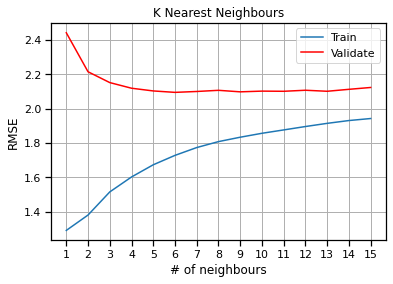

In [64]:
plot_error(metrics_n_tune_train[1], metrics_n_tune_val[1], range(1,16), 'RMSE', '# of neighbours')

## Optimised at 6 neighbours

In [4]:
%%time
y_train_pred = KNN_predict(x_train,y_train.to_numpy(),x_train,6)

Wall time: 1min 21s


In [5]:
y_val_pred = KNN_predict(x_train,y_train.to_numpy(),x_val,6)
%time y_test_pred = KNN_predict(x_train,y_train.to_numpy(),x_test,6)

Wall time: 18.6 s


In [6]:
train_results = calc_metrics(y_train_pred, y_train)
test_results = calc_metrics(y_test_pred, y_test)
val_results = calc_metrics(y_val_pred, y_val)

print(f"Training results:\nrmse={train_results[1]:.04f}\nmae={train_results[2]:.04f}\nr2={train_results[3]:.04f}\n")
print(f"Test results:\nrmse={test_results[1]:.04f}\nmae={test_results[2]:.04f}\nr2={test_results[3]:.04f}\n")
print(f"Validation results:\nrmse={val_results[1]:.04f}\nmae={val_results[2]:.04f}\nr2={val_results[3]:.04f}\n")

Training results:
rmse=1.7281
mae=1.0961
r2=0.7038

Test results:
rmse=1.9449
mae=1.2750
r2=0.6487

Validation results:
rmse=2.0954
mae=1.3211
r2=0.5692



In [13]:
knn_maes = abs(y_test_pred - y_test)

In [14]:
%store knn_maes

Stored 'knn_maes' (Series)


# Toy Problem

In [29]:
%store -r x_toy_train y_toy_train x_toy_test y_toy_test

In [30]:
y_pred_toy = KNN_predict(x_toy_train,y_toy_train,x_toy_test,6)

In [31]:
ae_toy = abs(y_pred_toy - y_toy_test)
mae_toy = ae_toy.mean()
mse_toy = (np.square(ae_toy).sum())/y_pred_toy.shape[0]
rmse_toy = np.sqrt(mse_toy)
print(f"RMSE for the toy problem = {rmse_toy:.04f}")

RMSE for the toy problem = 0.0519


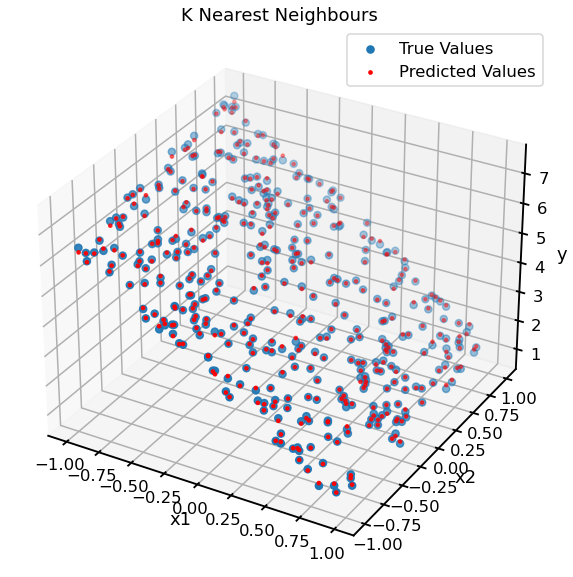

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_context("talk")
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_toy_test[:,0], x_toy_test[:,1], y_toy_test, s=50,label='True Values')
ax.scatter(x_toy_test[:,0], x_toy_test[:,1], y_pred_toy, color='r',s=10,label='Predicted Values')
plt.legend()
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("K Nearest Neighbours")
plt.savefig("figures\\knntoy.png")
plt.show()